### please work with a copy of this (or revert before git commit) to avoid git commit conflicts!
the analysis requires a few parameters:
- `path`: path to a data file output from the power sweep acquisition flowgraph
- `holdoff`: "transient window" duration to ignore at the start of each frequency step

In [134]:
%pylab inline

# permits 'import read' from the parent directory
import sys
if '..' not in sys.path:
    sys.path.insert(1,'..')
import read
import os
import pandas as pd

spectrum, metadata = read.swept_average(r'../data/dUsVcuPP 2020-06-03_14h25m16s.swept_power.dat')

# make the metadata into variables here
globals().update(metadata) 

# to plot by frequency, re-sort to group data at each frequency 
spectrum = spectrum.sort_index(level=['Sweep', 'Frequency', 'Time'])

spectrum

Populating the interactive namespace from numpy and matplotlib
0.3 0.0005 600


Dwell time elapsed (s)                           0.0500        0.0505  \
Sweep Time                      Frequency                               
0     2020-06-03 14:26:40-06:00 701.5     -5.616145e-12 -1.182824e-12   
      2020-06-03 14:24:32-06:00 709.0      1.267807e-11  7.179985e-12   
      2020-06-03 14:26:40-06:00 734.0      3.108403e-11  1.872980e-11   
      2020-06-03 14:24:32-06:00 739.0      1.439242e-11  1.039634e-11   
                                751.0     -1.305927e-10 -3.167766e-11   
...                                                 ...           ...   
37    2020-06-03 14:35:12-06:00 739.0      2.037853e-13  2.410896e-11   
                                842.5      1.375938e-11 -1.791950e-11   
                                2462.0    -1.275883e-11 -1.951039e-11   
                                5170.0    -2.067171e-11 -1.901367e-11   
                                5240.0     1.018553e-11  1.632246e-11   

Dwell time elapsed (s)                           0.0510        0.0515  \
Sweep Time                      Frequency                               
0     2020-06-03 14:26:40-06:00 701.5      7.719651e-12 -7.791566e-12   
      2020-06-03 14:24:32-06:00 709.0     -2.547158e-12 -3.505431e-13   
      2020-06-03 14:26:40-06:00 734.0      5.373756e-12  8.719028e-12   
      2020-06-03 14:24:32-06:00 739.0      1.805234e-11  2.057366e-11   
                                751.0     -1.294856e-10 -2.203958e-11   
...                                                 ...           ...   
37    2020-06-03 14:35:12-06:00 739.0     -1.990014e-12 -5.108281e-12   
                                842.5     -3.196645e-13 -7.489154e-12   
                                2462.0    -2.771586e-11 -1.118450e-11   
                                5170.0    -2.398831e-11 -4.631367e-11   
                                5240.0    -1.106040e-11  7.312216e-13   

Dwell time elapsed (s)                           0.0520        0.0525  \
Sweep Time                      Frequency                               
0     2020-06-03 14:26:40-06:00 701.5     -1.436941e-11  3.778857e-13   
      2020-06-03 14:24:32-06:00 709.0      1.448977e-11 -1.411893e-11   
      2020-06-03 14:26:40-06:00 734.0      1.436927e-11  3.864972e-11   
      2020-06-03 14:24:32-06:00 739.0      1.610012e-12 -8.870561e-12   
                                751.0      1.291645e-11  9.231139e-11   
...                                                 ...           ...   
37    2020-06-03 14:35:12-06:00 739.0     -2.215557e-11 -2.678887e-11   
                                842.5      1.515883e-11  2.964706e-12   
                                2462.0    -1.001190e-11 -7.082980e-12   
                                5170.0    -3.690822e-11 -1.315149e-11   
                                5240.0    -6.163108e-13 -1.584971e-11   

Dwell time elapsed (s)                           0.0530        0.0535  \
Sweep Time                      Frequency                               
0     2020-06-03 14:26:40-06:00 701.5     -1.327113e-11 -6.248920e-13   
      2020-06-03 14:24:32-06:00 709.0     -3.136577e-12  9.011508e-12   
      2020-06-03 14:26:40-06:00 734.0      4.020908e-12  3.102906e-12   
      2020-06-03 14:24:32-06:00 739.0      1.282955e-11  1.551345e-11   
                                751.0      1.898857e-10  8.964426e-11   
...                                                 ...           ...   
37    2020-06-03 14:35:12-06:00 739.0     -1.319528e-11 -1.495659e-11   
                                842.5      3.207704e-12  3.129415e-12   
                                2462.0    -9.962820e-12  5.902205e-12   
                                5170.0    -1.269617e-11 -2.876249e-11   
                                5240.0    -1.825067e-11 -1.180272e-11   

Dwell time elapsed (s)                           0.0540        0.0545  ...  \
Sweep Time                      Frequency                              ...   
0     2020-06-03 14:26:40-06:00 701.5      6

### Time series within dwell windows at each frequency

C:\Users\dan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


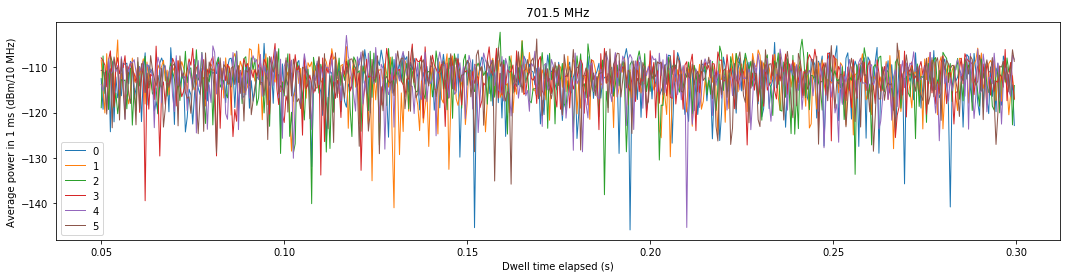

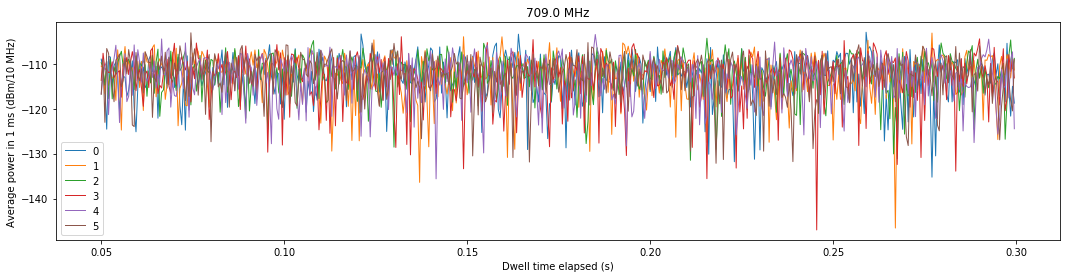

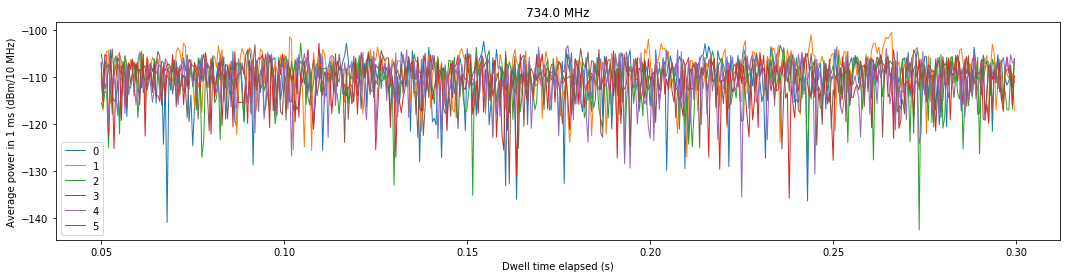

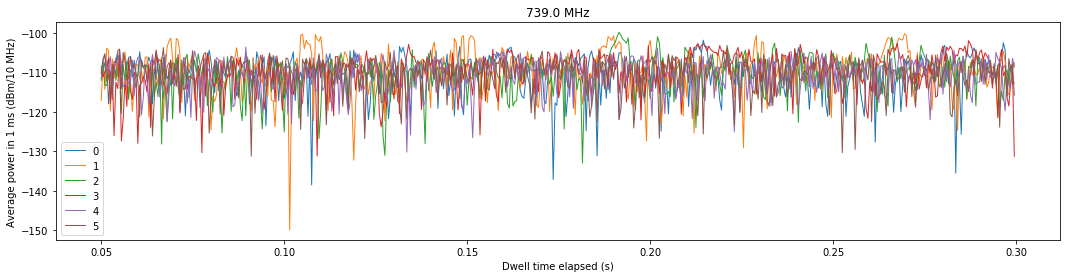

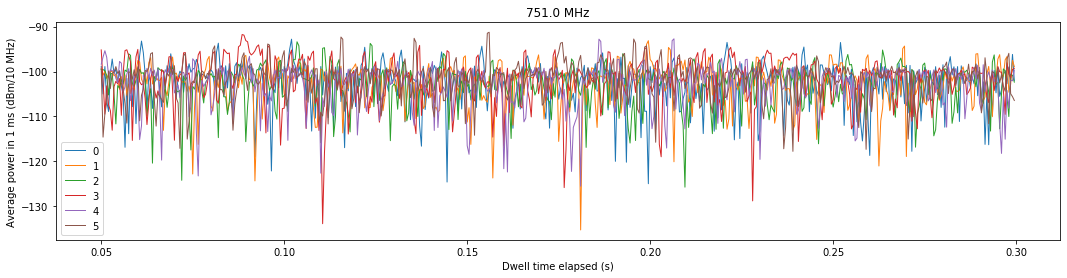

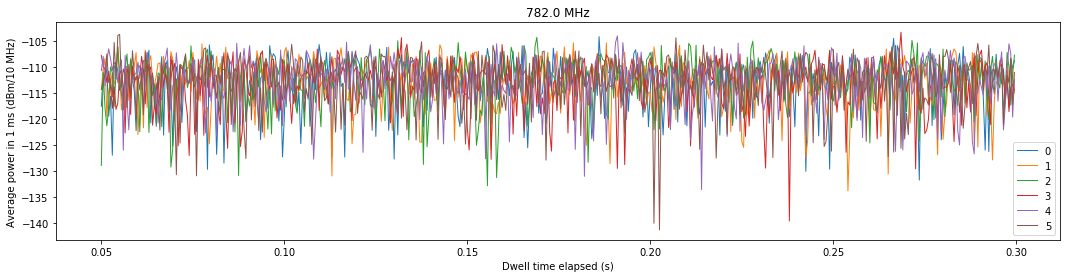

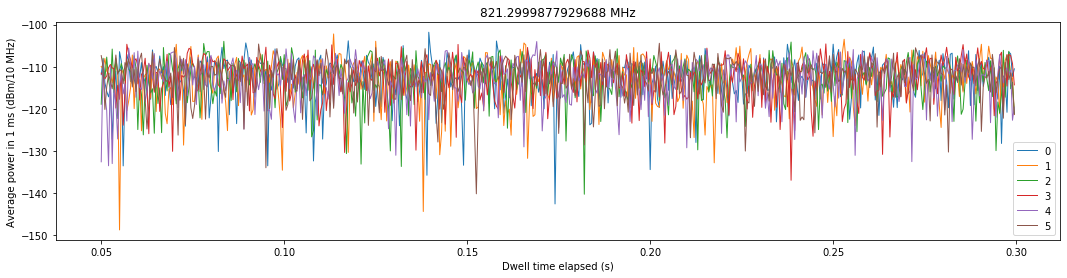

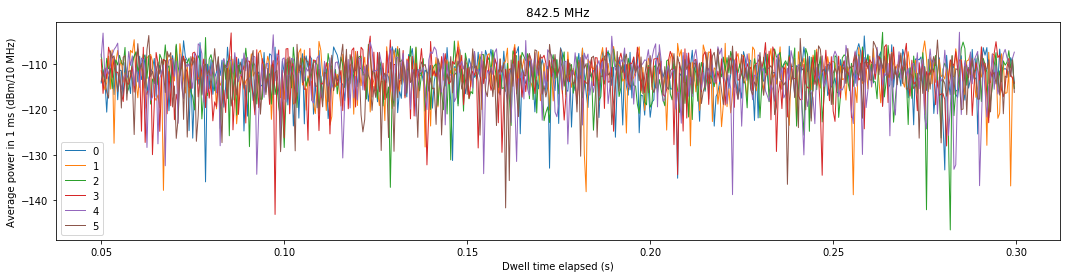

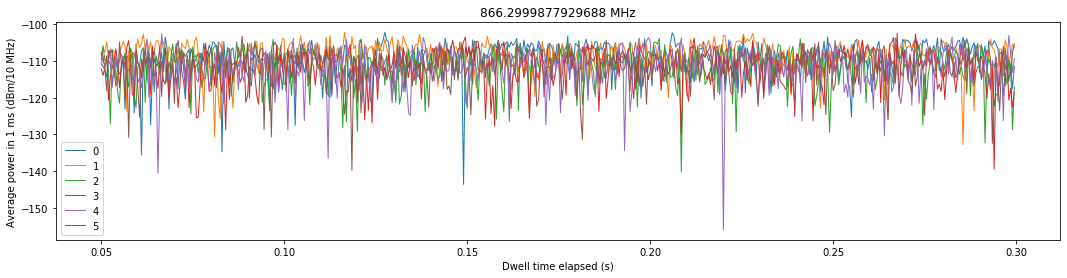

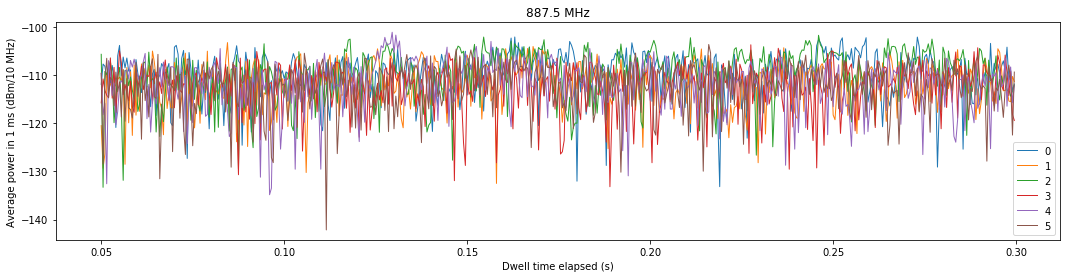

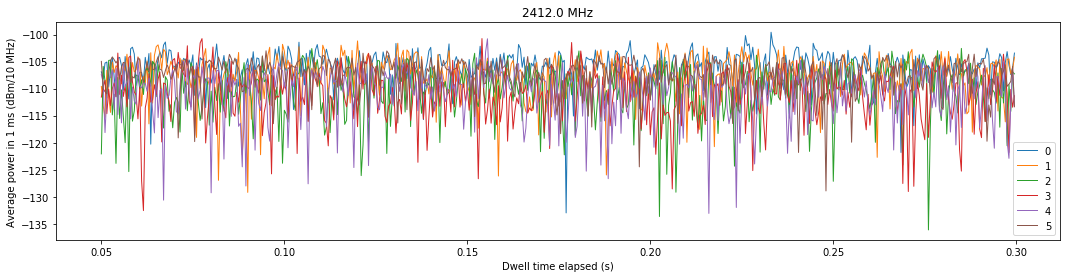

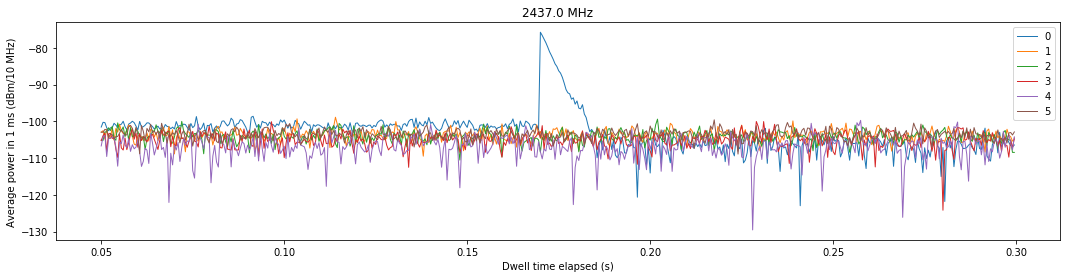

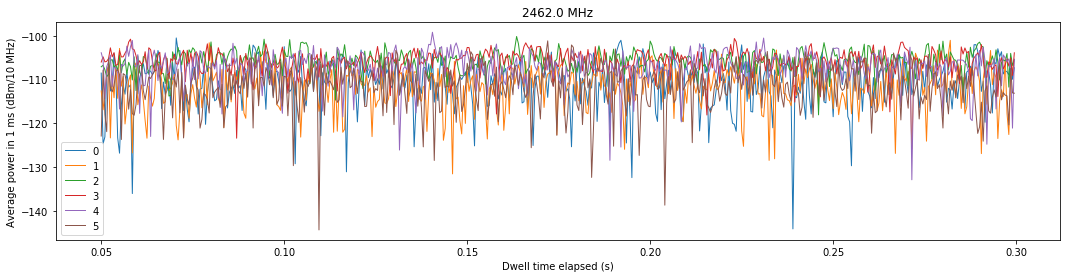

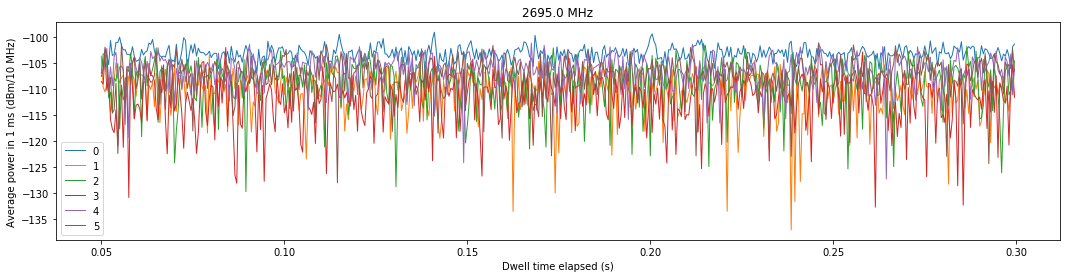

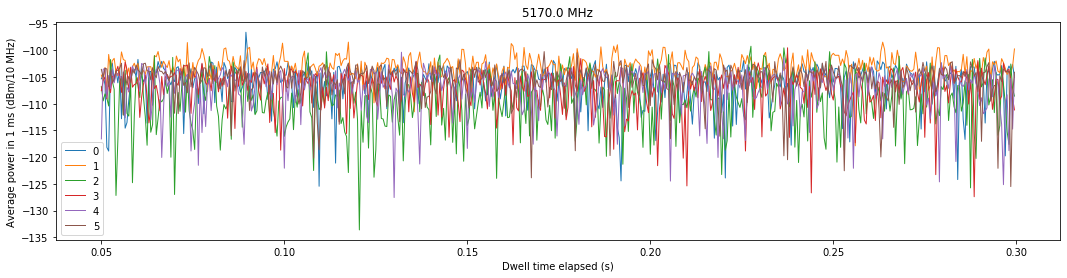

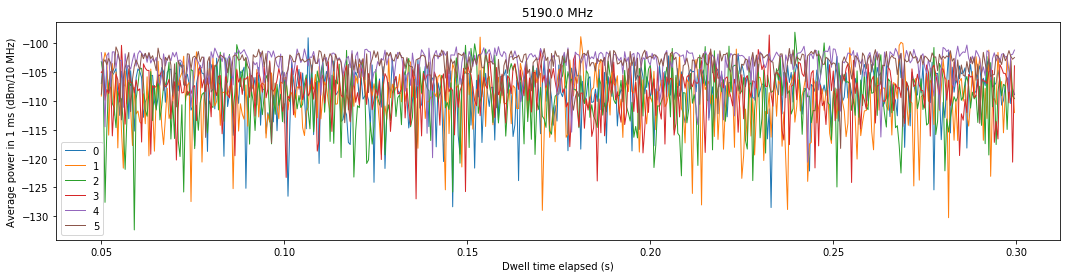

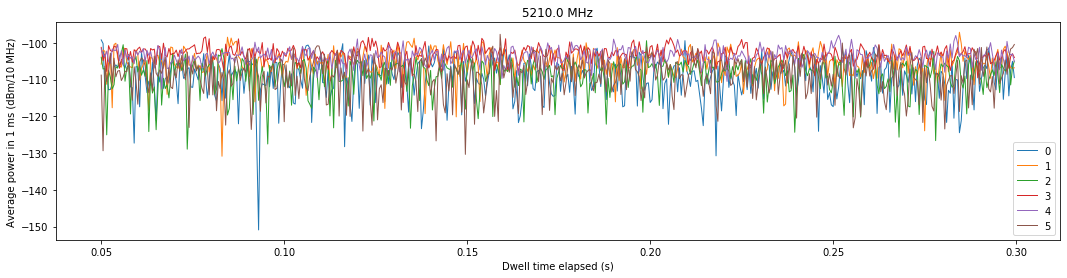

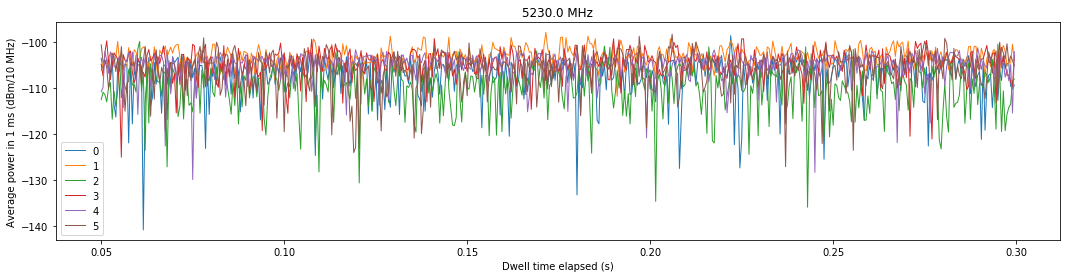

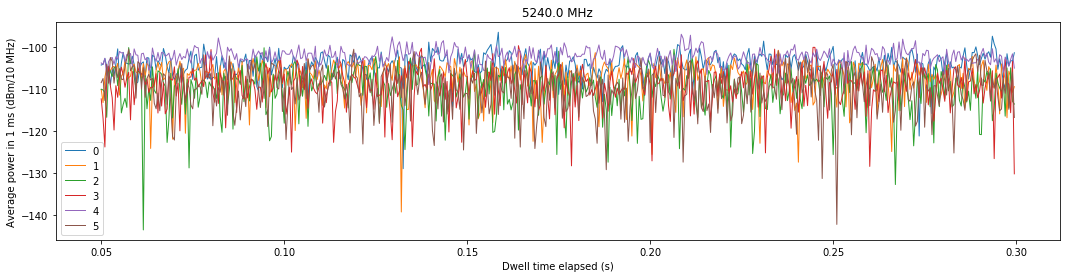

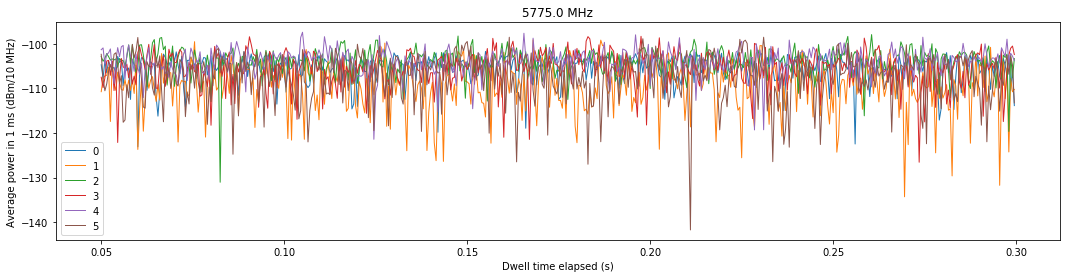

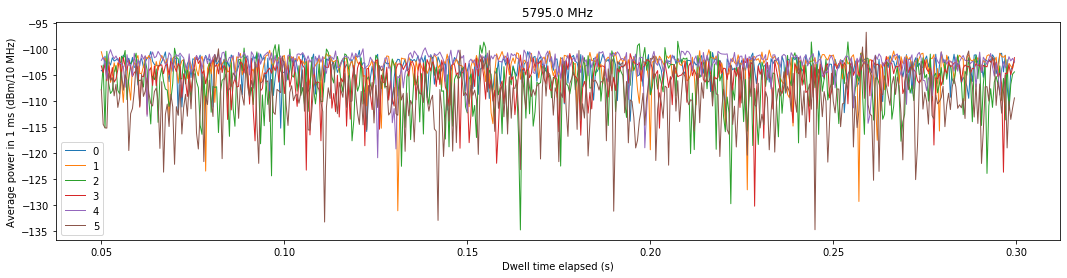

In [135]:
def plot_dwell_slices(spectrum, fc, name, count=5):
    fig,ax = subplots(1,1,sharey=True,sharex=True, figsize=(18,4))
    
    global dwells
    
    # take the data in dB at the given frequency
    dwells = 10*log10(np.abs(spectrum.loc[pd.IndexSlice[:,:,fc],:]))
    
    # clear out sweep and frequency index data
    dwells.index = dwells.index.droplevel(['Sweep', 'Frequency'])

    # take only `count` dwell windows, spread evenly over the test duration
    dwells = dwells.iloc[::dwells.shape[0]//count]
    
    dwells.index = np.arange(dwells.shape[0])
    
    dwells.T.plot(ax=ax,lw=1)
    ylabel('Average power in 1 ms (dBm/10 MHz)')
    title(name)
    return fig

for fc in spectrum.index.levels[2].unique():#(611, 701.5, 2412, 2437, 2695):
    plot_dwell_slices(spectrum, fc, f'{fc} MHz');

to explore the time p dataset, we can look at statistics of each dwell window over time. as a simple example to start, here are trends in min, max, and mean for each frequency under study:

### Time series of sweep summary statistics 

KeyError: 821.3

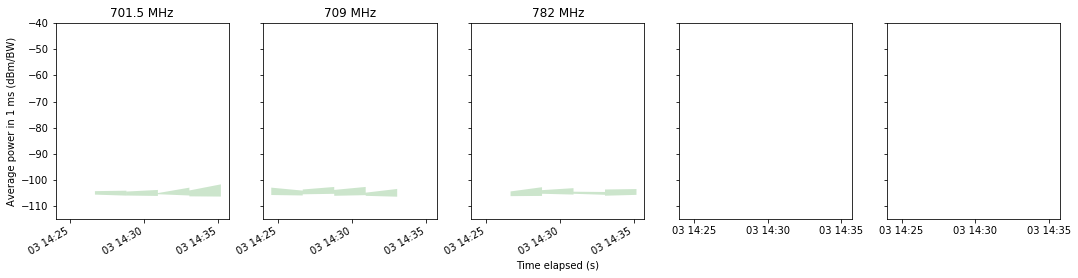

In [136]:
def plot_frequency_stats(dwell_summary, fcs, name, y_bounds=[-120,-30]):
    fig,axs = subplots(1,len(fcs),sharey=True,sharex=True, figsize=(18,4))
    
    if not hasattr(axs, '__len__'):
        axs = [axs]

    for fc, ax in zip(fcs, axs):
        fc_summary = dwell_summary.loc[pd.IndexSlice[:,:,fc],:]
        
        # bump "Time" out into a column from the index
        fc_summary = fc_summary.reset_index(level='Time')

        ax.fill_between(x=fc_summary.Time,
                        y1=fc_summary.Max,
                        y2=fc_summary.Min,
                        where=fc_summary.Max>fc_summary.Min,
                        facecolor='green', alpha=0.2, interpolate=True)

        fc_summary.plot(x='Time', y='Mean', ax=ax,color='green', legend=False)
        ax.set_title(f'{fc} MHz')
        if ax is axs[0]:
            ax.set_ylabel('Average power in 1 ms (dBm/BW)')
        if ax is axs[len(axs)//2]:
            ax.set_xlabel('Time elapsed (s)')
        else:
            ax.set_xlabel('')
        if ax is axs[-1]:
            ax.legend(['Mean','Extrema'], title=f'In {dwell_time:0.1f}s', loc='best')
        ylim([-115,-40])

    fig.suptitle(name)
    savefig(f"{path[:path.rfind('.')]} {name}.pdf")
    return fig

# compute summary statistics for the time series in each dwell window
dwell_summary = pd.DataFrame(dict(
                                Min=spectrum.min(axis=1),
                                Mean=spectrum.mean(axis=1),
                                Max=spectrum.max(axis=1)
                            ))
dwell_summary = 10*np.log10(np.abs(dwell_summary))

# # sequence & group rows by Frequency, maintaining Sweep order
# dwell_summary = (10*log10(dwell_summary))

# # move all fields from index into columns
# dwell_summary = dwell_summary.reset_index()

plot_frequency_stats(dwell_summary, [701.5,709,782,821.3,842.5], 'LTE Uplink Bands')
plot_frequency_stats(dwell_summary, [734,739,751,866.3,887.5], 'LTE Downlink Bands')
plot_frequency_stats(dwell_summary, [611,2695], 'Quiet bands')
plot_frequency_stats(dwell_summary, [2412,  2437,  2462], 'ISM Band')
plot_frequency_stats(dwell_summary, [5170,5190,5210,5230], 'U-NII1 Band (lower)')
plot_frequency_stats(dwell_summary, [5240,5775,5795], 'U-NII1 Band (upper)');

### Bounds checks on the input IQ samples
Expect undesirable compression effects around -30 dBm/4 MHz.

In [ ]:
# plot instantaneous sample power to
fig,ax = subplots(1,1,sharey=True,sharex=True, figsize=(18,4))

sample_maxima = 10*log10(metadata['peak_sample'].pivot(columns='Frequency', values='Sample peak').max(axis=0))
sample_maxima.plot(lw=0,marker='.',ax=ax)
ylabel(f'Maximum instantaneous sample power\n(dBm/{int(metadata["sample_rate"]/1e6)} MHz)')
xlabel('RF Center Frequency (MHz)');